# Without PCA LDA

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6168
Precision: 0.6138
Recall: 0.6168
F1-score: 0.5785

Logistic Regression:
Training Accuracy: 0.9937
Testing Accuracy: 0.8431
Precision: 0.8486
Recall: 0.8431
F1-score: 0.8380


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.4843
Testing Accuracy: 0.4599
Precision: 0.4335
Recall: 0.4599
F1-score: 0.4051

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4124
Precision: 0.4135
Recall: 0.4124
F1-score: 0.4098

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6642
Precision: 0.6641
Recall: 0.6642
F1-score: 0.6457

KNN:
Training Accuracy: 0.7398
Testing Accuracy: 0.5839
Precision: 0.6053
Recall: 0.5839
F1-score: 0.5650

SVM:
Training Accuracy: 0.9796
Testing Accuracy: 0.8212
Precision: 0.8541
Recall: 0.8212
F1-score: 0.8108

Naïve Bayes:
Training Accuracy: 0.5533
Testing Accuracy: 0.4854
Precision: 0.6255
Recall: 0.4854
F1-score: 0.4778

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.6165
Recall: 0.6314
F1-score: 0.5984


# PCA components are linear combinations of original feature

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit','Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=15)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303987 0.03795322 0.03237232
 0.02827052 0.0276402  0.02386062 0.02131589 0.02007177 0.0185174
 0.01752445 0.01637484 0.01580465]

Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT
Principal Component 11: NP1URIN
Principal Component 12: NP1PAIN
Principal Component 13: NP1PAIN
Principal Component 14: NP3RTARU
Principal Component 15: NP1CNST


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.7628
Precision: 0.7844
Recall: 0.7628
F1-score: 0.7469

Logistic Regression:
Training Accuracy: 0.9483
Testing Accuracy: 0.8869
Precision: 0.9020
Recall: 0.8869
F1-score: 0.8817

AdaBoost:
Training Accuracy: 0.5392
Testing Accuracy: 0.5036
Precision: 0.3291
Recall: 0.5036
F1-score: 0.3840

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8102
Precision: 0.8122
Recall: 0.8102
F1-score: 0.8102

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8577
Precision: 0.8623
Recall: 0.8577
F1-score: 0.8562

KNN:
Training Accuracy: 0.7978
Testing Accuracy: 0.7044
Precision: 0.7288
Recall: 0.7044
F1-score: 0.6896

SVM:
Training Accuracy: 0.9530
Testing Accuracy: 0.8285
Precision: 0.8428
Recall: 0.8285
F1-score: 0.8200

Naïve Bayes:
Training Accuracy: 0.8339
Testing Accuracy: 0.7664
Precision: 0.7815
Recall: 0.7664
F1-score: 0.7620

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8504
Precision: 0.8623
Recall

In [3]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303987 0.03795322 0.03237232
 0.02827052 0.0276402  0.02386062 0.02131589 0.02007177 0.0185174
 0.01752445 0.01637484 0.01580465]


Cumulative explained variance:
 [0.18554571 0.29208734 0.36808786 0.44112772 0.47908094 0.51145326
 0.53972378 0.56736398 0.5912246  0.61254049 0.63261226 0.65112967
 0.66865412 0.68502895 0.70083361]


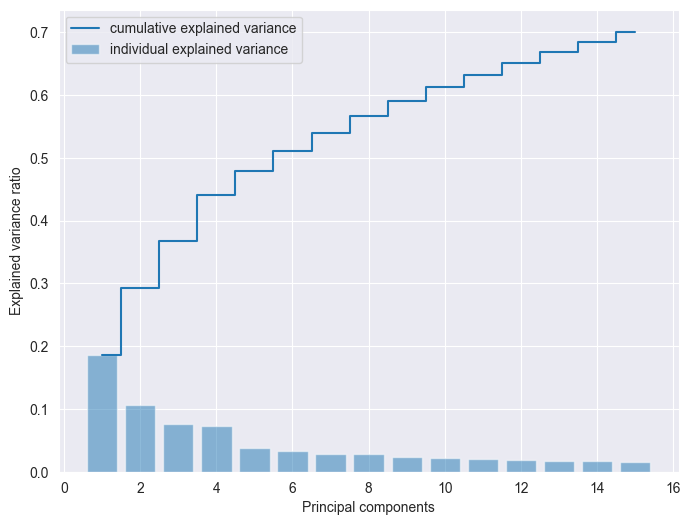

In [4]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [5]:
len(X_train_pca)

638

In [6]:
len(X_test_pca)

274

In [7]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV
NP2HOBB

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RTCON
NP3RTARU
NP1SLPN
NP3FTAPR
NP3HMOVR

Principal Component 4:
NP3RTCON
NP2TRMR
NP3RTARU
NP3RTALU
NP1SLPN

Principal Component 5:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 6:
NP3RIGN
NP3RIGLL
NP3LGAGR
NP3TTAPR
NP3RIGLU

Principal Component 7:
NP1SLPN
NP2SALV
NP1ANXS
NP1DPRS
NP2WALK

Principal Component 8:
NP2HWRT
NP1URIN
NP3POSTR
NP3GAIT
NP3RISNG

Principal Component 9:
NP3TTAPL
NP3TTAPR
NP2SALV
NP3HMOVR
NP3LGAGR

Principal Component 10:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1SLPD

Principal Component 11:
NP1URIN
NP1PAIN
NP1SLPN
NP3POSTR
NP3FACXP

Principal Component 12:
NP1PAIN
NP1URIN
NP1FATG
NP2SALV
NP1CNST

Principal Component 13:
NP1PAIN
NP2RISE
NP3KTRMR
NP3PTRMR
NP1URIN

Principal Component 14:
NP3RTARU
NP3RIGRL
NP3RTALU
NP3FTAPL
NP3RIGN

Principal Componen

In [8]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP3PTRMR', 'NP3TTAPR', 'NP3POSTR', 'NP1SLPD', 'NP3KTRMR', 'NP1CNST', 'NP2SALV', 'NP3FTAPL', 'NP3FTAPR', 'NP2TRMR', 'NP1URIN', 'NP3RIGLL', 'NP3RIGLU', 'NP2SPCH', 'NP3RISNG', 'NP3GAIT', 'NP3RIGRL', 'NP3RIGN', 'NP3TTAPL', 'NP3RTALU', 'NP2WALK', 'NP3LGAGR', 'NP1DPRS', 'NP1PAIN', 'NP2HOBB', 'NP3RTARU', 'NP3HMOVL', 'NP3HMOVR', 'NP1ANXS', 'NP3FACXP', 'NP2RISE', 'NP2HWRT', 'NP3RTCON', 'NP1SLPN', 'NP1FATG', 'NP3PRSPL'}

Length of union features: 36


In [9]:
# 3. Principal Component Scores
print("Principal Component Scores (first 5 samples):\n", X_train_pca[:5])

Principal Component Scores (first 5 samples):
 [[ 3.7315788   0.26673189  0.37847258 -0.65844786  1.332441    0.12953567
  -0.69503309  2.27863205 -0.86461843  1.73736932 -0.01347263  1.23611643
  -0.10088155 -0.24008634 -1.82850312]
 [-2.30295062  2.48156411 -0.39068576  0.34195405 -0.09973651  0.25277193
   1.05525971  0.34073071  0.39348691  0.47197523 -0.56686906  0.16751822
  -0.7893542   0.09993445  0.77135023]
 [ 0.63884192  2.32270645  0.48948026  0.12263814 -0.2865412  -0.10647128
   1.40795731  1.91680049  0.10465459  1.5566978  -0.54466848  1.1158574
  -1.08825289  0.66640549  0.3586088 ]
 [ 0.87289551  1.02832559  1.34079965 -1.52813068 -0.28537909 -1.37215737
   0.21686224 -1.37978018 -0.24072283  0.38939159 -0.47523773  0.56351805
   0.62856138  0.16240018  0.20756885]
 [ 1.12414646  2.06778494 -1.11769787 -1.21487761 -2.06043249 -0.19313934
  -1.97239559 -0.84110955  1.92206965  1.08223402  1.1702248   0.78792071
  -0.77560329  0.48927593  0.73212846]]


In [10]:
# 4. Loading Scores
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nLoading scores (contributions of each feature to the principal components):")
print(loading_scores)


Loading scores (contributions of each feature to the principal components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          -0.003017 -0.000342  0.014127 -0.014204 -0.000918  0.003488   
Circularity    0.002681 -0.002899 -0.002011  0.000294 -0.003504 -0.005456   
ConvexArea    -0.001486  0.001210  0.011414 -0.011540 -0.001986  0.004706   
EquivDiameter -0.007215  0.001599  0.008532 -0.010220  0.000626  0.000192   
Extent        -0.004122  0.000966 -0.006268 -0.005843 -0.003092 -0.007753   
...                 ...       ...       ...       ...       ...       ...   
NP3RTCON      -0.064161 -0.010013 -0.431705  0.608631 -0.003653  0.010607   
NP3SPCH        0.134180 -0.007565 -0.029891 -0.055974 -0.159924 -0.018737   
NP3TTAPL       0.198924 -0.269652 -0.028743  0.017673  0.078977  0.132652   
NP3TTAPR       0.184216  0.149800 -0.139428 -0.051680  0.133954  0.281291   
NHY            0.121963 -0.023089 -0.022687 -0.041905 -0.003373 -0.015397   

In [11]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first principal component:")
correlations = loading_scores['PC1']
print(correlations)


Correlation of each feature with the first principal component:
Area            -0.003017
Circularity      0.002681
ConvexArea      -0.001486
EquivDiameter   -0.007215
Extent          -0.004122
                   ...   
NP3RTCON        -0.064161
NP3SPCH          0.134180
NP3TTAPL         0.198924
NP3TTAPR         0.184216
NHY              0.121963
Name: PC1, Length: 91, dtype: float64


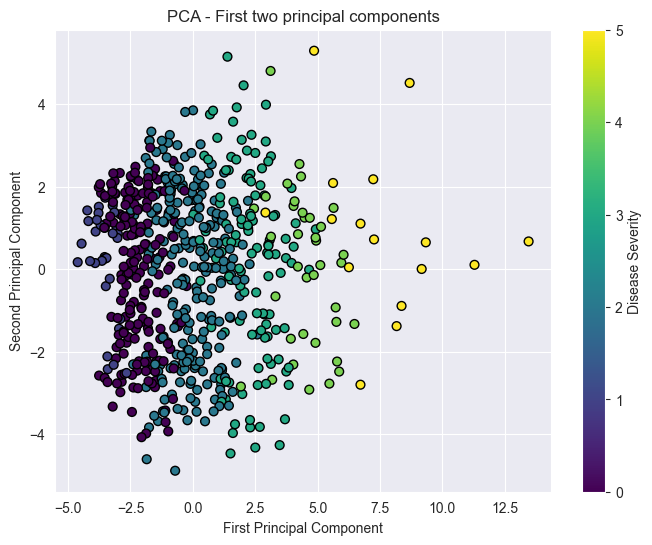

In [12]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()


In [13]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 15


In [14]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT
Principal Component 11: NP1URIN
Principal Component 12: NP1PAIN
Principal Component 13: NP1PAIN
Principal Component 14: NP3RTARU
Principal Component 15: NP1CNST



Correlation matrix of principal components:
 [[ 1.00000000e+00  3.98856687e-17 -4.98481863e-17  0.00000000e+00
  -4.64076661e-18 -2.00995869e-17  6.88267300e-17 -1.21812394e-16
   2.34117146e-17 -5.69705181e-17 -1.91444290e-18 -3.85347006e-17
   4.37090946e-17 -2.11956531e-17  6.90387321e-17]
 [ 3.98856687e-17  1.00000000e+00 -5.19341239e-18 -7.06349811e-17
  -9.18643014e-19  1.25993033e-17  2.27071660e-17  2.16190351e-17
  -3.08957691e-17 -3.26879830e-18 -2.52643546e-17  1.75355657e-17
  -4.68663325e-17  4.20734915e-17 -1.32866471e-17]
 [-4.98481863e-17 -5.19341239e-18  1.00000000e+00 -1.57593592e-16
  -2.03032208e-16  6.59513370e-17  4.03278976e-17  3.39876103e-18
  -2.28628526e-16  1.87707337e-16 -4.28752630e-17 -2.07620948e-17
   4.26843827e-18  1.32471963e-17 -4.04521168e-17]
 [ 0.00000000e+00 -7.06349811e-17 -1.57593592e-16  1.00000000e+00
   9.61564775e-18 -2.27452621e-16 -2.05685593e-17 -4.16035282e-17
   2.46276301e-16 -3.39520694e-16  2.03421393e-17 -4.23574154e-18
  -3.2655

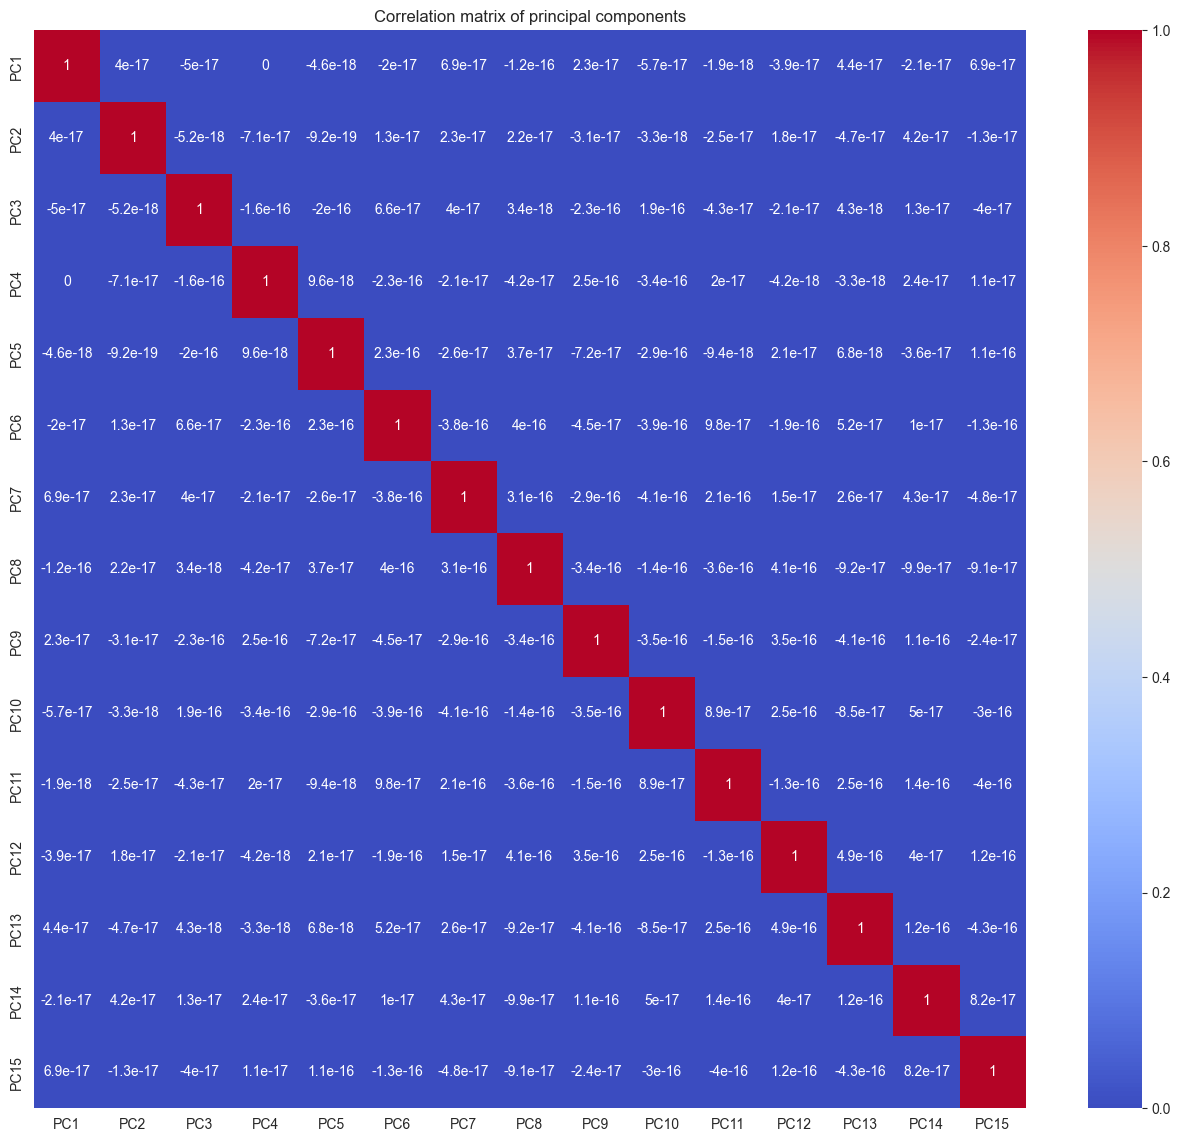

In [15]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_components = min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




5

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8905
Testing Precision: 0.8999
Testing Recall: 0.8905
Testing F1-score: 0.8847

Logistic Regression:
Training Accuracy: 0.9608
Testing Accuracy: 0.8431
Testing Precision: 0.8476
Testing Recall: 0.8431
Testing F1-score: 0.8380


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost:
Training Accuracy: 0.6129
Testing Accuracy: 0.5365
Testing Precision: 0.4373
Testing Recall: 0.5365
Testing F1-score: 0.4395

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8540
Testing Precision: 0.8556
Testing Recall: 0.8540
Testing F1-score: 0.8499

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8650
Testing Precision: 0.8709
Testing Recall: 0.8650
Testing F1-score: 0.8616

KNN:
Training Accuracy: 0.9639
Testing Accuracy: 0.8394
Testing Precision: 0.8487
Testing Recall: 0.8394
Testing F1-score: 0.8331

SVM:
Training Accuracy: 0.9655
Testing Accuracy: 0.8394
Testing Precision: 0.8540
Testing Recall: 0.8394
Testing F1-score: 0.8354

Naïve Bayes:
Training Accuracy: 0.9592
Testing Accuracy: 0.8723
Testing Precision: 0.8949
Testing Recall: 0.8723
Testing F1-score: 0.8738

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8540
Testing Precision: 0.8724
Testing Recall: 0.8540
Testing F1-score: 0.8513


In [17]:
# 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.91934566 0.03327494 0.02425811 0.01391601 0.00920528]


Cumulative explained variance:
 [0.91934566 0.9526206  0.97687871 0.99079472 1.        ]


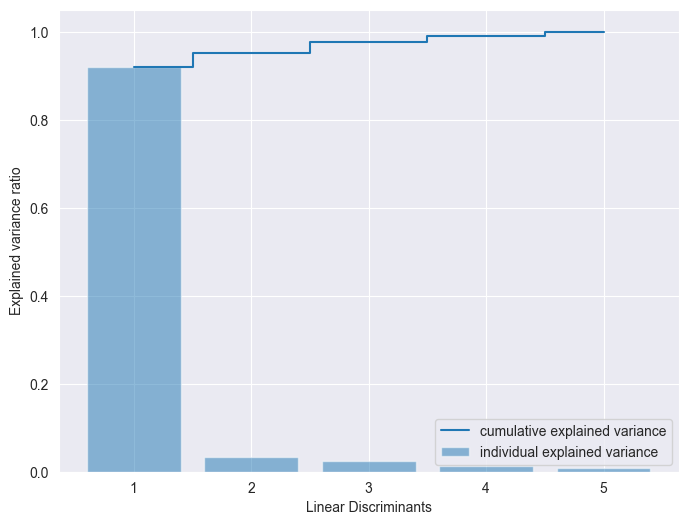

In [18]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.show()

In [19]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 4.25013002 -0.22847413 -0.53237742  0.53731739  0.44748277]
 [-2.78952911  0.35078869 -0.7972776   0.5693765   0.02579577]
 [ 1.58855256 -0.36014116  0.03318462 -1.05268653  0.11762723]
 [-0.07156362 -1.45207798  0.0547041   0.0381225   1.45905378]
 [ 1.33005914  1.5610691   1.20151824  0.51930589 -0.48712186]]


In [20]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                     LD1         LD2        LD3        LD4        LD5
Area           15.183195  102.628312  25.912894  46.984293  14.946919
Circularity     0.180005   -0.666588  -0.800250   2.118727  -1.510794
ConvexArea     -3.328259    1.302332  -2.343871   3.499897   4.187623
EquivDiameter  -3.703883   -6.507613 -10.299550   2.963924  -4.565365
Extent          0.238001   -0.911154   1.270719   0.748494   0.621236
...                  ...         ...        ...        ...        ...
NP3RTCON        0.305726    0.044085   0.100677  -0.417540   0.097781
NP3SPCH         0.186278    0.012802  -0.046338  -0.016770  -0.047664
NP3TTAPL        0.257083    0.198543   0.451901   0.156702  -0.369210
NP3TTAPR        0.120897   -0.086494  -0.100370   0.072234   0.385018
NHY            -0.219869    0.064794   0.985396  -0.599454   0.480402

[91 rows x 5 columns]


In [29]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD2']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             102.628312
Circularity       -0.666588
ConvexArea         1.302332
EquivDiameter     -6.507613
Extent            -0.911154
                    ...    
NP3RTCON           0.044085
NP3SPCH            0.012802
NP3TTAPL           0.198543
NP3TTAPR          -0.086494
NHY                0.064794
Name: LD2, Length: 91, dtype: float64


In [30]:
correlations

Area             102.628312
Circularity       -0.666588
ConvexArea         1.302332
EquivDiameter     -6.507613
Extent            -0.911154
                    ...    
NP3RTCON           0.044085
NP3SPCH            0.012802
NP3TTAPL           0.198543
NP3TTAPR          -0.086494
NHY                0.064794
Name: LD2, Length: 91, dtype: float64

In [23]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:10]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:10]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['Shannon_Entropy', 'gabor_energy', 'homogeneity', 'gabor_entropy', 'Area', 'Standard Deviation', 'FilledArea', 'Skewness', 'energy', 'contrast']
Component 2: ['Area', 'FilledArea', 'homogeneity', 'Standard Deviation', 'Skewness', 'contrast', 'gabor_energy', 'Shannon_Entropy', 'dissimilarity', 'Kurtosis']
Component 3: ['gabor_energy', 'Shannon_Entropy', 'gabor_entropy', 'Area', 'Kurtosis', 'Skewness', 'lbp_energy', 'FilledArea', 'Standard Deviation', 'contrast']
Component 4: ['FilledArea', 'Area', 'gabor_energy', 'Shannon_Entropy', 'Standard Deviation', 'Skewness', 'gabor_entropy', 'contrast', 'Kurtosis', 'energy']
Component 5: ['Skewness', 'Standard Deviation', 'homogeneity', 'dissimilarity', 'Kurtosis', 'contrast', 'Shannon_Entropy', 'gabor_energy', 'FilledArea', 'lbp_energy']

Union of top 20 features for each LDA component:
{'gabor_energy', 'lbp_energy', 'Area', 'Skewness', 'dissimilarity', 'homogeneity', 'contrast', 'Shannon_Ent

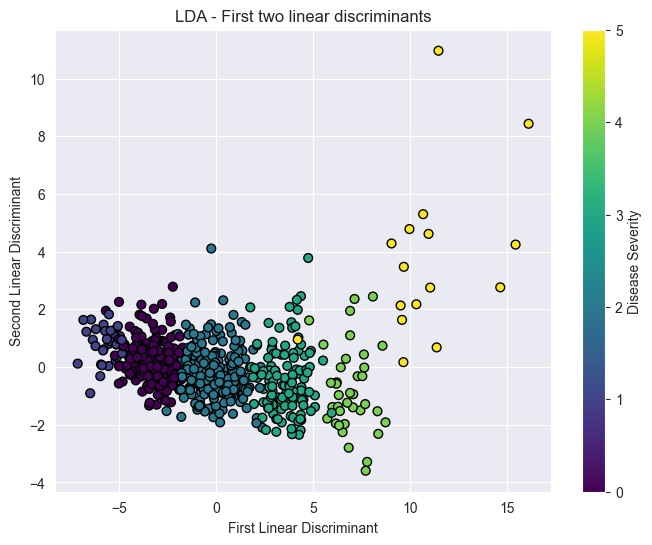

In [24]:
# 6. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.show()


In [25]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 4


In [26]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Shannon_Entropy
Linear Discriminant 2: Area
Linear Discriminant 3: gabor_energy
Linear Discriminant 4: FilledArea
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00  2.79662325e-14 -6.28634592e-15 -2.79461984e-15
   2.53301163e-15]
 [ 2.79662325e-14  1.00000000e+00  3.17658408e-15 -9.81139343e-16
  -1.93915822e-15]
 [-6.28634592e-15  3.17658408e-15  1.00000000e+00 -2.91257606e-15
  -3.78595317e-15]
 [-2.79461984e-15 -9.81139343e-16 -2.91257606e-15  1.00000000e+00
  -3.57273951e-16]
 [ 2.53301163e-15 -1.93915822e-15 -3.78595317e-15 -3.57273951e-16
   1.00000000e+00]]


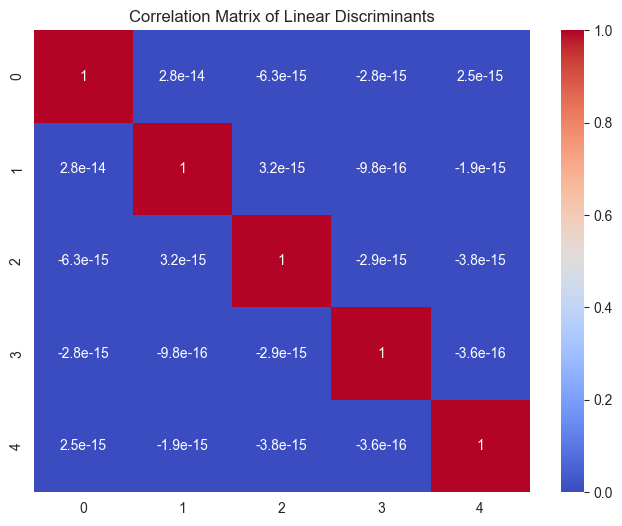

In [27]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [28]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Shannon_Entropy.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by gabor_energy.
Linear Discriminant 4 is largely influenced by FilledArea.
Linear Discriminant 5 is largely influenced by Skewness.
